([<matplotlib.axis.XTick at 0x1a6d4c4358>,
 <a list of 2 Text xticklabel objects>)

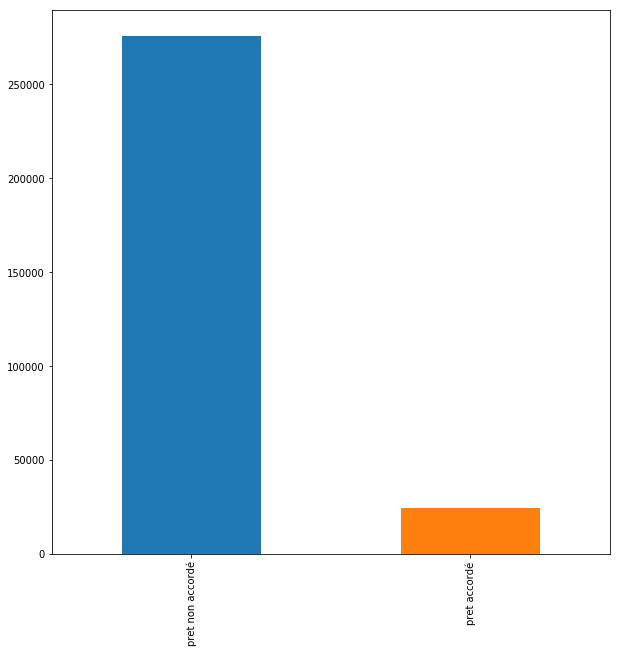

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import svm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import fbeta_score,make_scorer,precision_score,recall_score,accuracy_score
from sklearn.externals import joblib

data_clients = pd.read_csv('dataset.csv')
pret = data_clients.TARGET.value_counts()
pret.plot(kind="bar", figsize=(10, 10))
bars = ('pret non accordé', 'pret accordé')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)

([<matplotlib.axis.XTick at 0x1a61b312b0>,
 <a list of 2 Text xticklabel objects>)

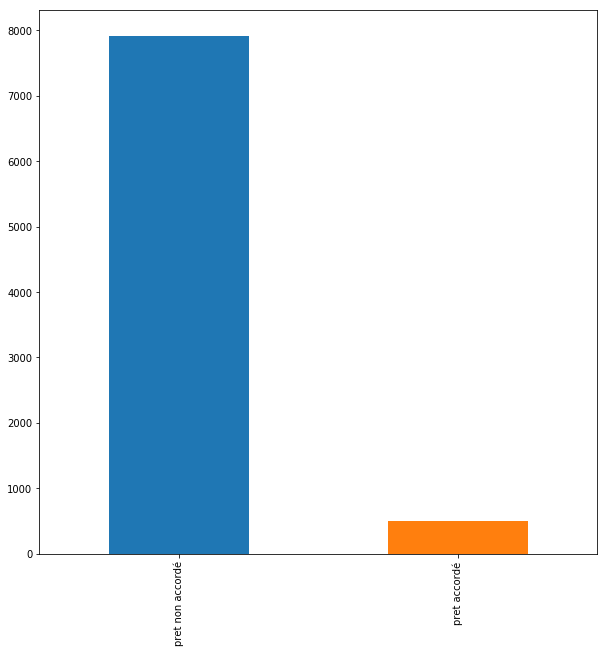

In [78]:
data_clients = data_clients.dropna()
#for back fill
#data_clients = data_clients.fillna(method='bfill',inplace=True)
#for forward-fill
#data_clients = data_clients.fillna(method='ffill',inplace=True)
#colums_without = data_clients.columns[data_clients.isnull().any()].tolist()

data_clients.NAME_TYPE_SUITE = data_clients.NAME_TYPE_SUITE.astype(str)
data_clients.NAME_INCOME_TYPE = data_clients.NAME_INCOME_TYPE.astype(str)
data_clients.OCCUPATION_TYPE = data_clients.OCCUPATION_TYPE.astype(str)

labelencoder = LabelEncoder()
data_clients.NAME_CONTRACT_TYPE = labelencoder.fit_transform(data_clients.NAME_CONTRACT_TYPE)
data_clients.FLAG_OWN_CAR = labelencoder.fit_transform(data_clients.FLAG_OWN_CAR)
data_clients.CODE_GENDER = labelencoder.fit_transform(data_clients.CODE_GENDER)
data_clients.FLAG_OWN_CAR = labelencoder.fit_transform(data_clients.FLAG_OWN_CAR)
data_clients.FLAG_OWN_REALTY = labelencoder.fit_transform(data_clients.FLAG_OWN_REALTY)
data_clients.NAME_TYPE_SUITE = labelencoder.fit_transform(data_clients.NAME_TYPE_SUITE)
data_clients.NAME_INCOME_TYPE = labelencoder.fit_transform(data_clients.NAME_INCOME_TYPE)
data_clients.NAME_EDUCATION_TYPE =labelencoder.fit_transform(data_clients.NAME_EDUCATION_TYPE)
data_clients.NAME_FAMILY_STATUS =labelencoder.fit_transform(data_clients.NAME_FAMILY_STATUS)
data_clients.NAME_HOUSING_TYPE =labelencoder.fit_transform(data_clients.NAME_HOUSING_TYPE)
data_clients.OCCUPATION_TYPE =labelencoder.fit_transform(data_clients.OCCUPATION_TYPE)
data_clients.WEEKDAY_APPR_PROCESS_START = labelencoder.fit_transform(data_clients.WEEKDAY_APPR_PROCESS_START)
data_clients.ORGANIZATION_TYPE = labelencoder.fit_transform(data_clients.ORGANIZATION_TYPE)

#for i in colums_without :
    #data_clients[i] = data_clients[i].replace(np.NaN,data_clients[i].mean())

pret = data_clients.TARGET.value_counts()
pret.plot(kind="bar", figsize=(10, 10))
bars = ('pret non accordé', 'pret accordé')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)



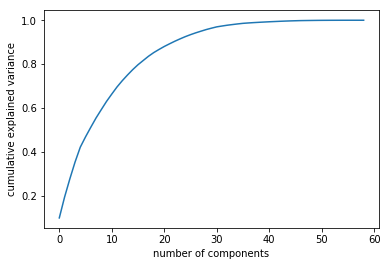

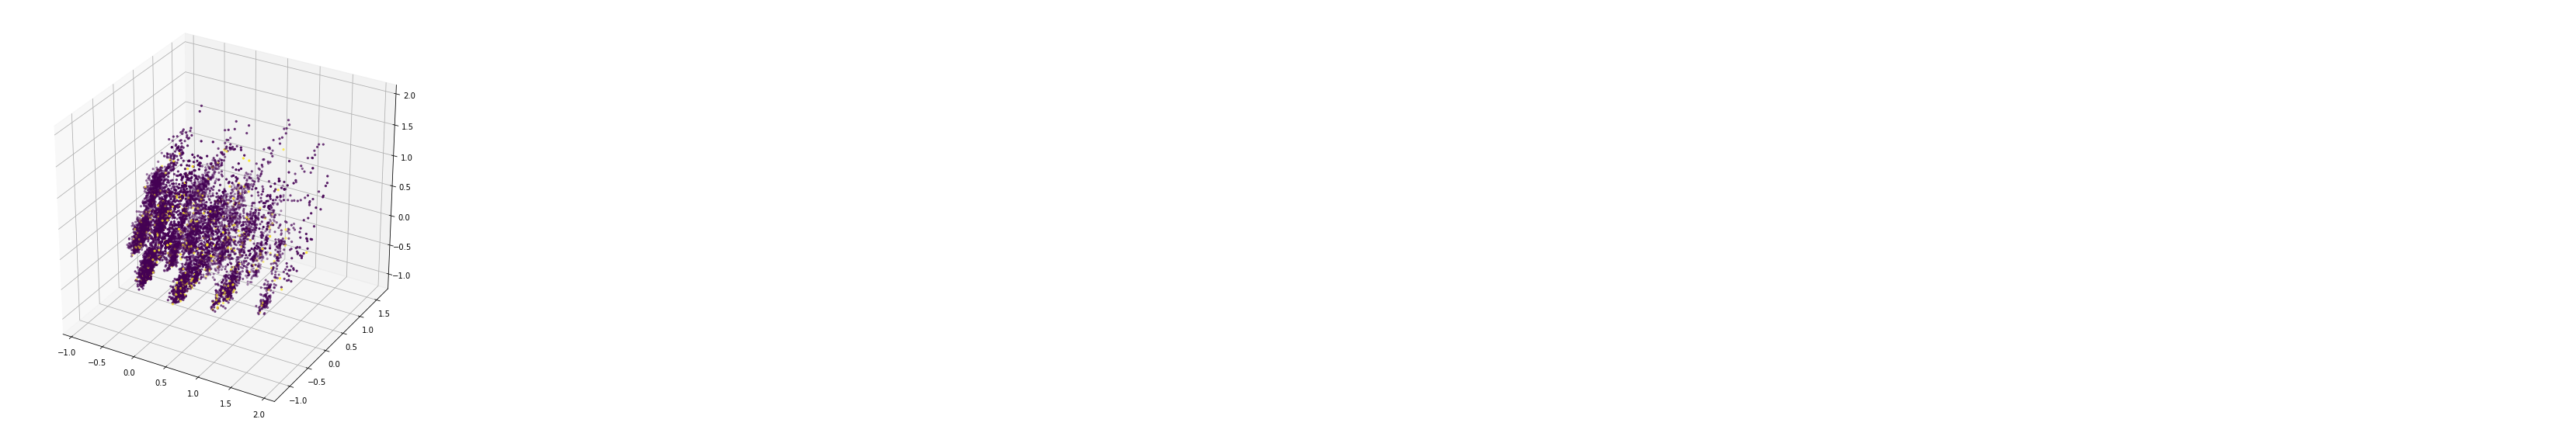

In [79]:
target = data_clients.TARGET
data_clients.drop(data_clients.columns[[0]], axis=1, inplace=True)

scaler_maxabs = MaxAbsScaler()
data_clients = scaler_maxabs.fit_transform(data_clients)

pca = PCA().fit(data_clients)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

pca3D = PCA(n_components=3)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

X_pca_3d = pca3D.fit_transform(data_clients)
ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2],
           c=target, s=5)
plt.show()

X_train = PCA(n_components=40).fit_transform(data_clients)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: Undefined

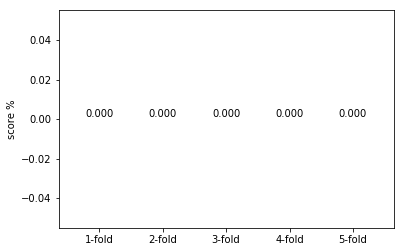

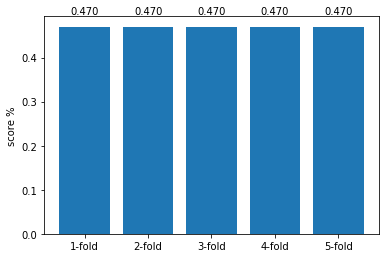

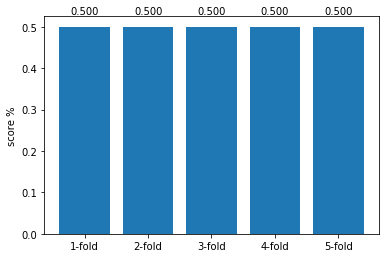

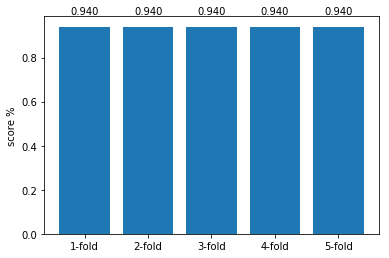

{'fit_time': array([5.05808687, 5.62862301, 5.42462611, 5.53052497, 5.08861208]), 'score_time': array([0.19759989, 0.24735403, 0.2108531 , 0.21881413, 0.19917178]), 'test_precision_macro': array([0.47001188, 0.47001188, 0.47001188, 0.47001188, 0.47001188]), 'train_precision_macro': array([0.47001188, 0.47001188, 0.47001188, 0.47001188, 0.47001188]), 'test_recall_macro': array([0.5, 0.5, 0.5, 0.5, 0.5]), 'train_recall_macro': array([0.5, 0.5, 0.5, 0.5, 0.5]), 'test_f1': array([0., 0., 0., 0., 0.]), 'train_f1': array([0., 0., 0., 0., 0.]), 'test_accuracy': array([0.94002375, 0.94002375, 0.94002375, 0.94002375, 0.94002375]), 'train_accuracy': array([0.94002375, 0.94002375, 0.94002375, 0.94002375, 0.94002375])}


In [82]:
clf = RandomForestClassifier(bootstrap=True,
            criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300,
            oob_score=False,
            verbose=0, warm_start=False)


scoring = ['precision_macro','recall_macro','f1','accuracy']

scores = cross_validate(clf,X_train,target,cv=5,return_train_score=True,scoring=scoring)
sorted(scores.keys())

objects = ('1-fold', '2-fold', '3-fold', '4-fold', '5-fold')
performancef1 = [scores['test_f1'][0],scores['test_f1'][1],scores['test_f1'][2],scores['test_f1'][3],scores['test_f1'][4]]
performanceprec = [scores['test_precision_macro'][0],scores['test_precision_macro'][1],scores['test_precision_macro'][2],scores['test_precision_macro'][3],scores['test_precision_macro'][4]]
performancerecall = [scores['test_recall_macro'][0],scores['test_recall_macro'][1],scores['test_recall_macro'][2],scores['test_recall_macro'][3],scores['test_recall_macro'][4]]
performanceaccuracy = [scores['test_accuracy'][0],scores['test_accuracy'][1],scores['test_accuracy'][2],scores['test_accuracy'][3],scores['test_accuracy'][4]]




fig, ax = plt.subplots()
rects = plt.bar(objects,performancef1)
plt.ylabel('score %')
def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%0.3f'%height,
                ha='center', va='bottom')
autolabel(rects)
plt.show()

fig, ax = plt.subplots()
rects = plt.bar(objects,performanceprec)
plt.ylabel('score %')
def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%0.3f'%height,
                ha='center', va='bottom')
autolabel(rects)
plt.show()

fig, ax = plt.subplots()
rects = plt.bar(objects,performancerecall)
plt.ylabel('score %')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%0.3f'%height,
                ha='center', va='bottom')
autolabel(rects)
plt.show()

fig, ax = plt.subplots()
rects = plt.bar(objects,performanceaccuracy)
plt.ylabel('score %')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%0.3f'%height,
                ha='center', va='bottom')
autolabel(rects)
plt.show()

print(scores)

In [5]:
#clf = RandomForestClassifier(bootstrap=True,
            #criterion='gini',
            #max_depth=6, max_features='auto', max_leaf_nodes=None,
            #min_impurity_decrease=0.0, min_impurity_split=None,
            #min_samples_leaf=4, min_samples_split=10,
            #min_weight_fraction_leaf=0.0, n_estimators=300,
            #oob_score=False,class_weight ='balanced_subsample',
            #verbose=0, warm_start=False)
#clf.fit(X_train,target)

# save the model to disk
#filename = 'predict'
#joblib.dump(clf, filename)

['predict']

In [76]:
#ddata = pd.read_csv('predict.csv')
#data(data.columns[[0]], axis=1, inplace=True)
#data = data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1)
#data.to_csv('datasetOut.csv')
#data = data.drop(columns=['TARGET'])
#data.to_csv('datasetOut.csv')
#data = data.dropna()
#data = data.head(1000)
#data.to_csv('datasetOut.csv')
#ddata

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE
0,0,0,0,1,0,0,0,202500.0,1575000.0,43312.5,...,0.3333,0.3750,0.2714,0.3009,0.3923,0.0039,0.0023,0.3771,0.2951,0.9856
1,1,0,0,1,0,1,0,202500.0,182016.0,6988.5,...,0.3333,0.3750,0.0420,0.1816,0.2315,0.0000,0.0000,0.2269,0.1382,0.9846
2,2,0,0,0,0,1,0,180000.0,697500.0,21901.5,...,0.1667,0.2083,0.0339,0.0588,0.0623,0.0000,0.0000,0.0735,0.0641,0.9796
3,3,0,0,0,0,1,0,405000.0,1288350.0,37800.0,...,0.1250,0.1667,0.0920,0.0790,0.0981,0.0039,0.0000,0.0998,0.0000,0.9801
4,4,0,0,0,0,0,1,174420.0,450000.0,12375.0,...,0.0833,0.1250,0.0000,0.0303,0.0427,0.0000,0.0000,0.0378,0.0779,0.9896
5,5,0,0,1,0,1,0,225000.0,1262583.0,37044.0,...,0.1667,0.0000,0.0195,0.0454,0.0764,0.0000,0.0000,0.0567,0.1061,0.9985
6,6,0,0,0,0,0,0,112500.0,837000.0,27130.5,...,0.3333,0.3750,0.0000,0.1210,0.1520,0.0000,0.0000,0.1513,0.1892,0.9866
7,7,0,1,0,0,1,1,225000.0,405000.0,20250.0,...,0.1667,0.2083,0.0000,0.0462,0.0368,0.0000,0.0000,0.0578,0.0000,0.9796
8,8,0,0,1,0,0,0,180000.0,122256.0,13293.0,...,0.3333,0.3750,0.1350,0.1185,0.1369,0.0039,0.0542,0.1481,0.0472,0.9826
9,9,0,0,0,0,1,1,157500.0,732915.0,78934.5,...,0.3333,0.3750,0.0485,0.0756,0.0850,0.0000,0.0011,0.0945,0.0000,0.9886
